In [2]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.read_csv("covid-19-all.csv", low_memory=False)
print(df.head(10))

print(df.shape)


  Country/Region Province/State  Latitude  Longitude  Confirmed  Recovered  \
0            NaN            NaN       NaN        NaN    51526.0    41727.0   
1            NaN            NaN       NaN        NaN    58316.0    33634.0   
2            NaN            NaN       NaN        NaN    99897.0    67395.0   
3            NaN            NaN       NaN        NaN     8117.0     7463.0   
4            NaN            NaN       NaN        NaN    17568.0    11146.0   
5            NaN            NaN       NaN        NaN      159.0      148.0   
6            NaN            NaN       NaN        NaN  1629594.0  1426676.0   
7            NaN            NaN       NaN        NaN   159738.0   143355.0   
8            NaN            NaN       NaN        NaN      118.0      114.0   
9            NaN            NaN       NaN        NaN     4947.0     3197.0   

    Deaths        Date  
0   2191.0  2021-01-01  
1   1181.0  2021-01-01  
2   2762.0  2021-01-01  
3     84.0  2021-01-01  
4    405.0  2021

In [3]:
print(df.isnull().sum())

Country/Region    171061
Province/State    223211
Latitude          171062
Longitude         171062
Confirmed             19
Recovered            386
Deaths               432
Date                   0
dtype: int64


In [4]:
df = df.dropna(subset=['Country/Region'])
df = df.dropna(subset=['Province/State'])
df = df.dropna(subset=['Latitude'])
df = df.dropna(subset=['Longitude'])
df = df.dropna(subset=['Confirmed'])
df = df.dropna(subset=['Recovered'])
df = df.dropna(subset=['Deaths'])


In [5]:
df.drop_duplicates()
df["Date"]= pd.to_datetime(df['Date'])

print(df['Country/Region'].value_counts().head(30))
df['Date'].min(), df['Date'].max()


Country/Region
US                     897462
Russia                  17762
China                   11011
Japan                   10631
India                    7537
Colombia                 7352
Mexico                   7282
Brazil                   6121
Ukraine                  5778
Peru                     5668
Italy                    4872
Spain                    4635
Canada                   4566
Sweden                   4410
Germany                  3944
United Kingdom           3887
Chile                    3842
Netherlands              3331
France                   2907
Australia                2581
Pakistan                 1435
Belgium                   600
Denmark                   595
Hong Kong                  39
Macau                      39
Taiwan                     38
Others                     33
Cruise Ship                13
Israel                      5
Taipei and environs         1
Name: count, dtype: int64


(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [6]:
df.to_csv("cleaned_Covid-19.csv", index =False)

In [7]:
top_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top_countries)

least_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=True).head(10)
print(least_countries)


Country/Region
US                1.727862e+09
India             1.078397e+09
Brazil            8.865505e+08
Russia            2.847050e+08
Spain             1.776554e+08
United Kingdom    1.610389e+08
Colombia          1.546591e+08
Mexico            1.481053e+08
Italy             1.423581e+08
Peru              1.419645e+08
Name: Confirmed, dtype: float64
Country/Region
Israel                       5.0
Taipei and environs         47.0
Macau                      383.0
Taiwan                    1005.0
Hong Kong                 2613.0
Cruise Ship               9144.0
Others                   17084.0
Denmark                 109377.0
Australia              5090821.0
France                 5999641.0
Name: Confirmed, dtype: float64


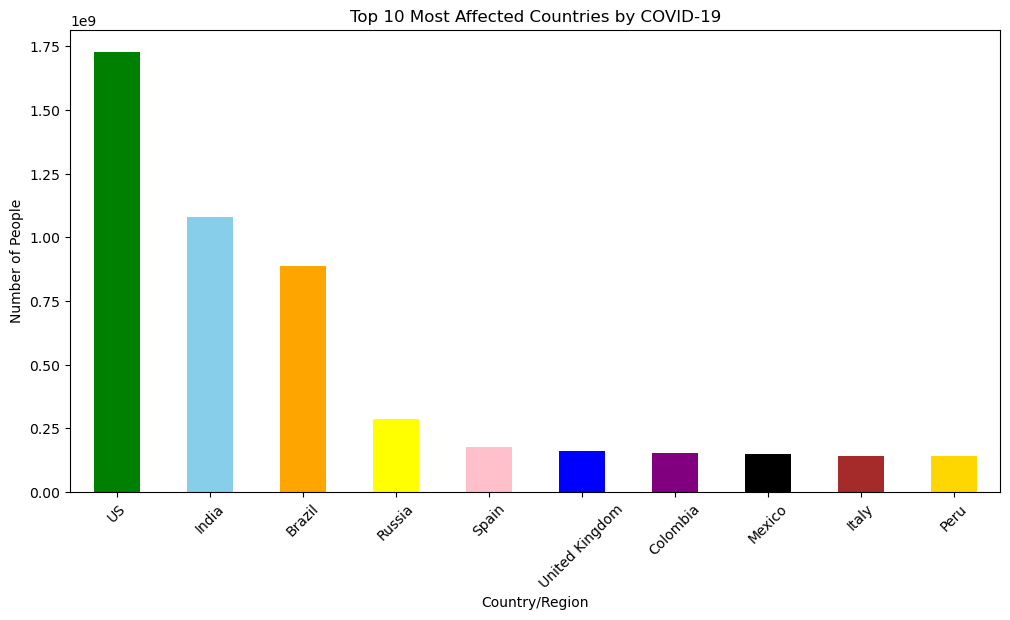

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries by confirmed cases
# Bar plot for top 10 countries
top_countries.plot(kind='bar', figsize=(12,6), color=['green', 'skyblue','orange','yellow','pink','blue','purple','black','brown','gold'])
plt.title('Top 10 Most Affected Countries by COVID-19')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()


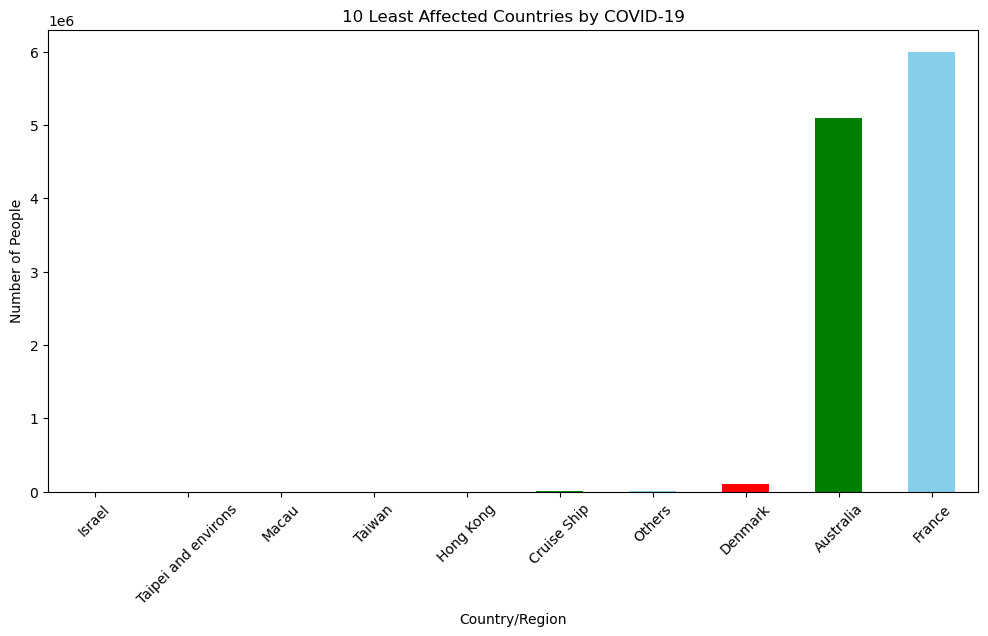

In [9]:
# Bar plot
least_countries.plot(kind='bar', figsize=(12,6), color=['skyblue','red','green'])
plt.title('10 Least Affected Countries by COVID-19')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()

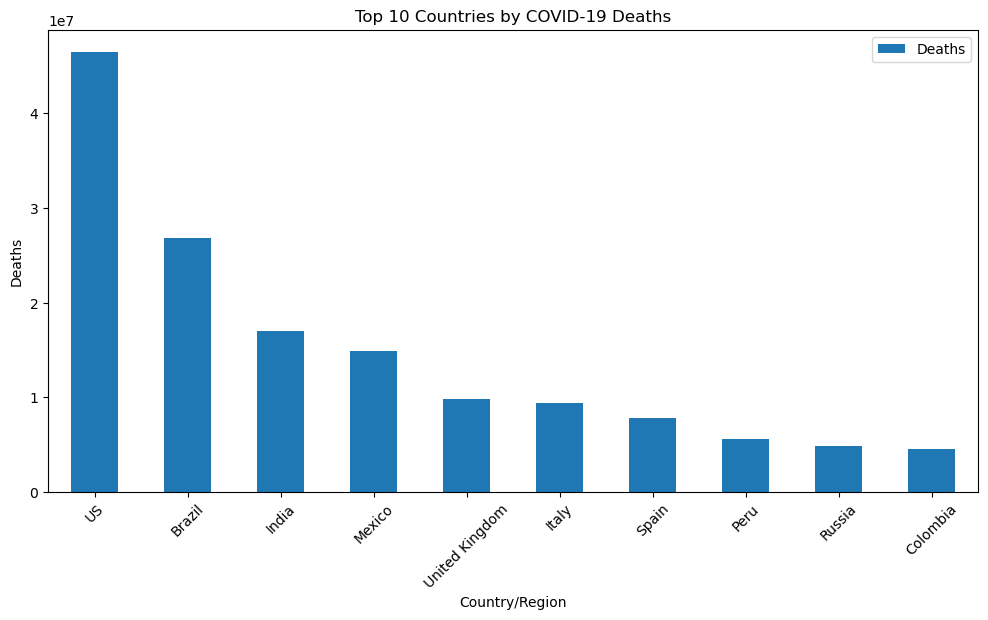

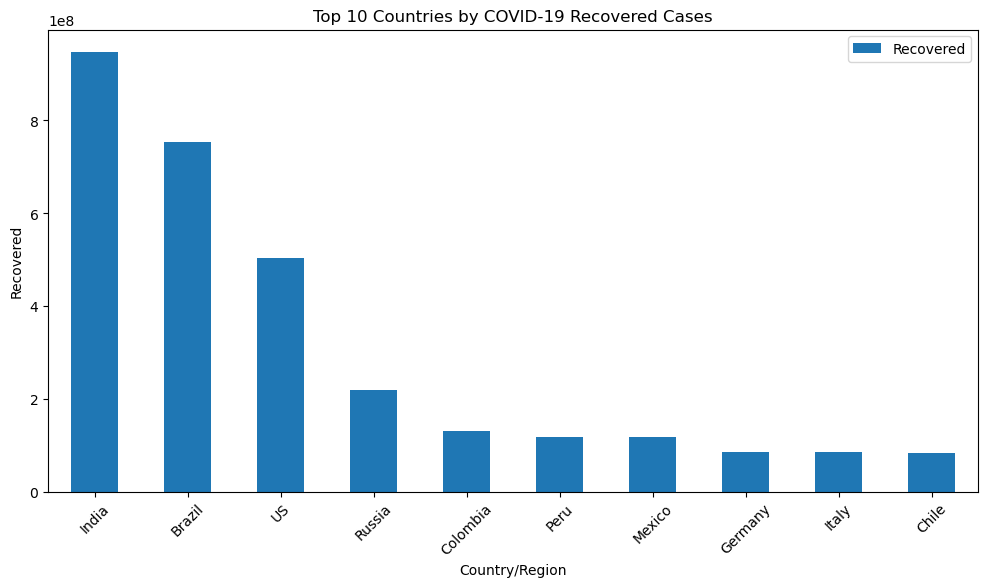

In [17]:
# Top 10 by deaths
top_deaths = df.groupby('Country/Region')[['Deaths']].sum().sort_values(by='Deaths', ascending=False).head(10)
top_deaths.plot(kind='bar', figsize=(12,6), )
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()

# Top 10 by recovered
top_recovered = df.groupby('Country/Region')[['Recovered']].sum().sort_values(by='Recovered', ascending=False).head(10)
top_recovered.plot(kind='bar', figsize=(12,6),)
plt.title('Top 10 Countries by COVID-19 Recovered Cases')
plt.ylabel('Recovered')
plt.xticks(rotation=45)
plt.show()
